In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score

from sklearn.datasets import load_iris, load_digits, load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

%reload_ext autotime

time: 0 ns (started: 2024-07-15 15:49:58 +09:00)


In [3]:
# 데이터 생성
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

time: 0 ns (started: 2024-07-15 15:36:04 +09:00)


In [4]:
print(f"X: {X}")
print(f"y: {y}")

X: [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0

In [5]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train.shape: {X_train.shape}")

X_train.shape: (80, 1)
time: 0 ns (started: 2024-07-15 15:37:14 +09:00)


In [6]:
# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측
y_pred = lin_reg.predict(X_test)

print(y_pred)

[[4.49875411]
 [9.15273606]
 [8.46643942]
 [7.85214193]
 [5.59173117]
 [6.6071719 ]
 [5.77852817]
 [8.975125  ]
 [4.25815864]
 [6.23983135]
 [6.56122114]
 [7.54434267]
 [8.70839426]
 [9.45538878]
 [4.81247932]
 [5.01640666]
 [8.46098398]
 [4.55746321]
 [8.80346608]
 [5.09761775]]
time: 32 ms (started: 2024-07-15 15:37:49 +09:00)


In [8]:
# 평가
mse = mean_squared_error(y_test, y_pred) # 평균제곱오차
r2 = r2_score(y_test, y_pred) # 결정계수

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.6536995137170021
R^2 Score: 0.8072059636181392
time: 0 ns (started: 2024-07-15 15:39:49 +09:00)


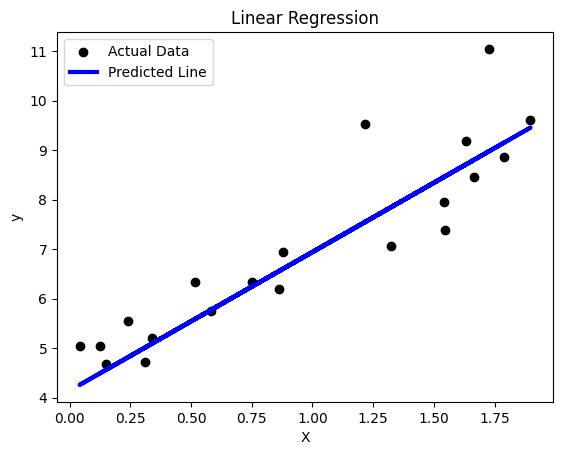

time: 141 ms (started: 2024-07-15 15:40:46 +09:00)


In [13]:
# 시각화
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [15]:
data = load_iris()
X = data.data
y = data.target

time: 0 ns (started: 2024-07-15 15:41:18 +09:00)


In [16]:
print(f"X: {X}")
print(f"y: {y}")

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1

In [19]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
nb = GaussianNB()
nb.fit(X_train, y_train)

# 예측
y_pred = nb.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
time: 0 ns (started: 2024-07-15 15:43:07 +09:00)


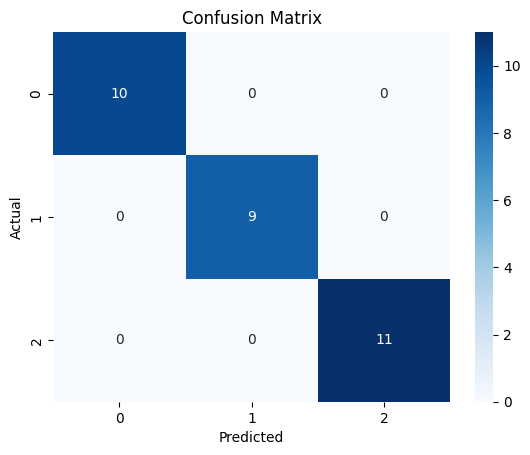

time: 140 ms (started: 2024-07-15 15:43:57 +09:00)


In [22]:
# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# 데이터 생성
digits = load_digits()
X = digits.data
y = digits.target

print(f"X: {X}")
print(f"y: {y}")

X: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y: [0 1 2 ... 8 9 8]
time: 15 ms (started: 2024-07-15 15:44:36 +09:00)


In [26]:
# 모델 생성
nb = GaussianNB()

# 교차 검증
scores = cross_val_score(nb, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean CV Score: {np.mean(scores)}")

Cross-validation scores: [0.78055556 0.78333333 0.79387187 0.8718663  0.80501393]
Mean CV Score: 0.8069281956050759
time: 15 ms (started: 2024-07-15 15:45:22 +09:00)


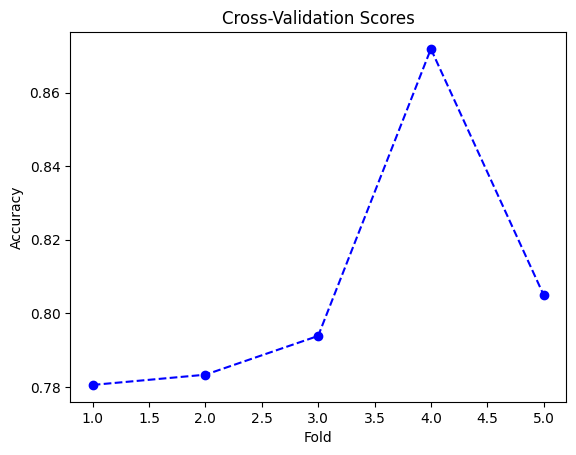

time: 94 ms (started: 2024-07-15 15:46:21 +09:00)


In [30]:
# 시각화
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

In [31]:
# 데이터 생성
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
nb = GaussianNB()
nb.fit(X_train, y_train)

# 예측
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[40  3]
 [ 0 71]]
time: 31 ms (started: 2024-07-15 15:48:04 +09:00)


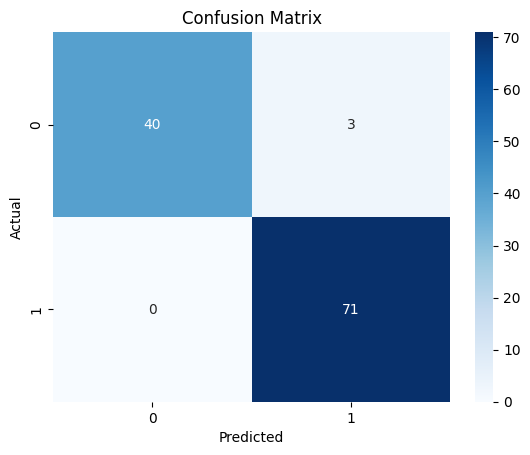

time: 110 ms (started: 2024-07-15 15:48:49 +09:00)


In [32]:
# 시각화 - 혼동 행렬
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9983622666229938
time: 15 ms (started: 2024-07-15 15:50:27 +09:00)


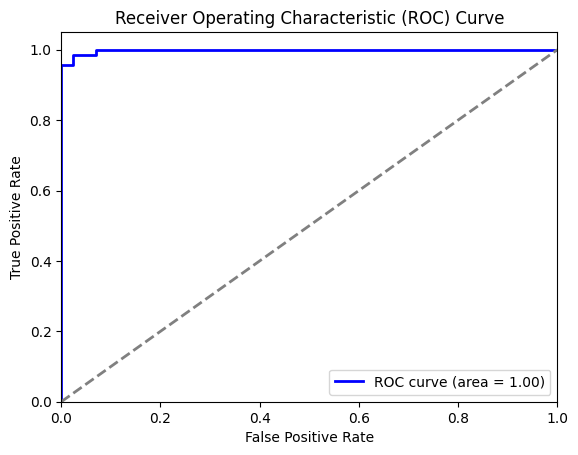

time: 110 ms (started: 2024-07-15 15:52:22 +09:00)


In [43]:
# 시각화 - ROC 곡선
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()